# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
from dqn_agent import Agent
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [4]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64\Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Random action
In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

### 4. Train the agent
The next code cell is used to train the agent.

In [7]:
def dqn(agent, max_episodes=1000, decay=1.0, min_score=15.0):
    """Deep Q-Learning.
    
    Params
    ======
        agent (Agent): the agent to train
        max_episodes (int): maximum number of episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): epsilon decay
        min_score (float): minimum score to reach before training is finished
        
    Return
    ======
        state_dict: state dict
    """
    scores = []                                  # initialize scores
    eps = 0.5                                    # initialize epsilon
    for i_episode in range(1, max_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]           # get the current state
        score = 0                                         # initialize the score
        while True:
            action = agent.act(state, eps)                     # select an action
            env_info = env.step(np.int32(action))[brain_name]  # send the action to the environment
            next_state = env_info.vector_observations[0]       # get the next state
            reward = env_info.rewards[0]                       # get the reward
            done = env_info.local_done[0]                      # see if episode has finished        
            
            agent.step(state, action, reward, next_state, done)
            state = next_state                                   # roll over the state to next time step
            score += reward
            
            if done:
                break                                            # exit loop if episode finished
        
        
        scores.append(score)                             # save score
        eps = max(0.01, eps*decay)                       # epsilon decay
        
        # print episode stats
        if i_episode%100==0:
            print('\nEpisode {:d}\tAverage Score {:.2f}'.format(i_episode, np.mean(scores[-100:])))
        
        
        if np.mean(scores[-100:])>=min_score: # finish training if min score is reached
            break
    
    # print final stats
    print('\nTraining finished in {:d} episodes\nAverage Score: {:.2f}'.format(i_episode, np.mean(scores[-100:])))
    
    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode')
    plt.show()
    
    # return updated state dict
    return agent.qnetwork_local.state_dict()


Episode 100	Average Score 2.99

Episode 200	Average Score 10.39

Episode 300	Average Score 12.54

Episode 400	Average Score 13.96

Training finished in 467 episodes
Average Score: 15.01


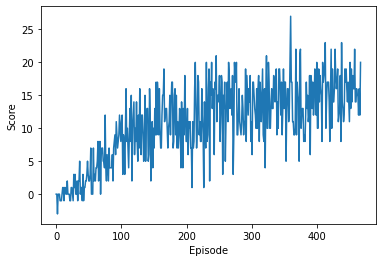

In [8]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)                                  # initialize the agent
state_dict = dqn(agent=agent, max_episodes=1000, decay=0.98, min_score=15.0)  # use dqn to train the agent

torch.save(state_dict, 'state_dict.pth')




### 5. Run the agent

In the code below the agent uses the saved DQN to interact with the environment.

In [6]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0) # create agent
agent.qnetwork_local.load_state_dict(torch.load('state_dict.pth'))    # restore trained dict

env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state, eps=0.2)
    env_info = env.step(np.int32(action))[brain_name]  
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]  
    score += reward 
    state = next_state
    if done:
        break 
    
print("Score {:.2f}".format(score))

Score: 17.0


When finished, you can close the environment.

In [7]:
env.close()